In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [2]:
#read in data
dataset = pd.read_csv('data/data.csv')

In [3]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [4]:
dataset.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
dataset.corr()

/var/folders/39/ct5wx3w50hd2957r32v7y3600000gn/T/ipykernel_19003/2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


/var/folders/39/ct5wx3w50hd2957r32v7y3600000gn/T/ipykernel_19003/2053990242.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(dataset.corr())
/var/folders/39/ct5wx3w50hd2957r32v7y3600000gn/T/ipykernel_19003/2053990242.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)


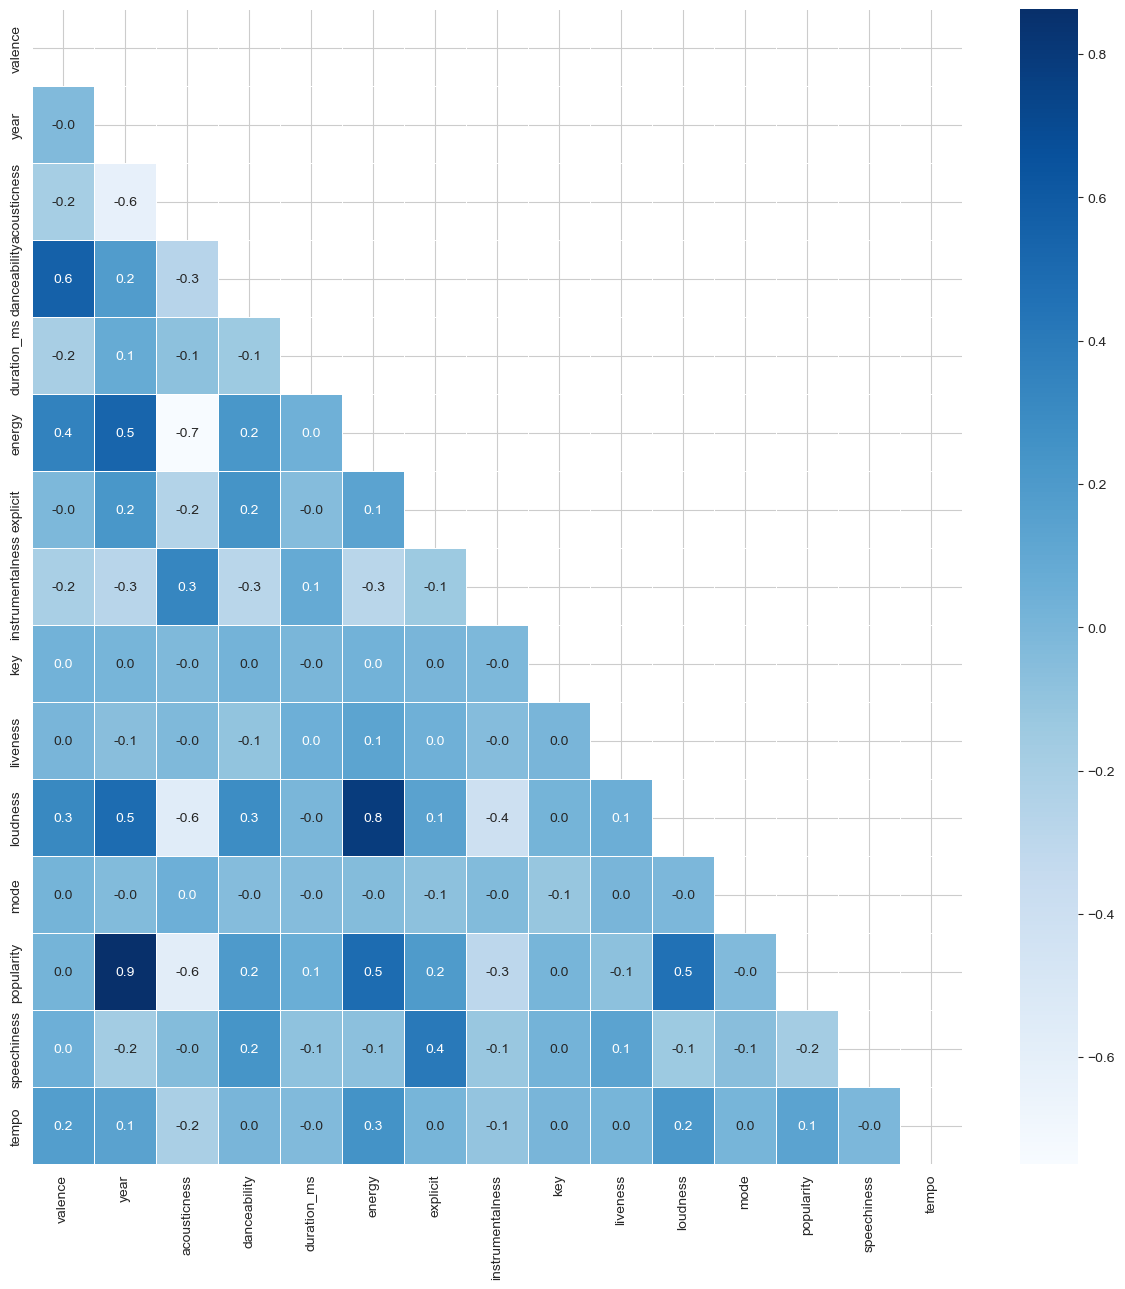

In [6]:
f,ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dataset.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [12]:
#Select features and labels
features = ['valence', 'acousticness', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
x = dataset.loc[:, features].values
y = dataset['danceability'].values

In [13]:
#Split data into train, test, validation sets
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [19]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=2) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=2) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=2) train accuracy is:  0.8091680233020199
With KNN (K=2) test accuracy is:  0.39284407647050645


In [26]:
knn = KNeighborsRegressor(n_neighbors = 9)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=9) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=9) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=9) train accuracy is:  0.6095594383533871
With KNN (K=9) test accuracy is:  0.5075486458329039


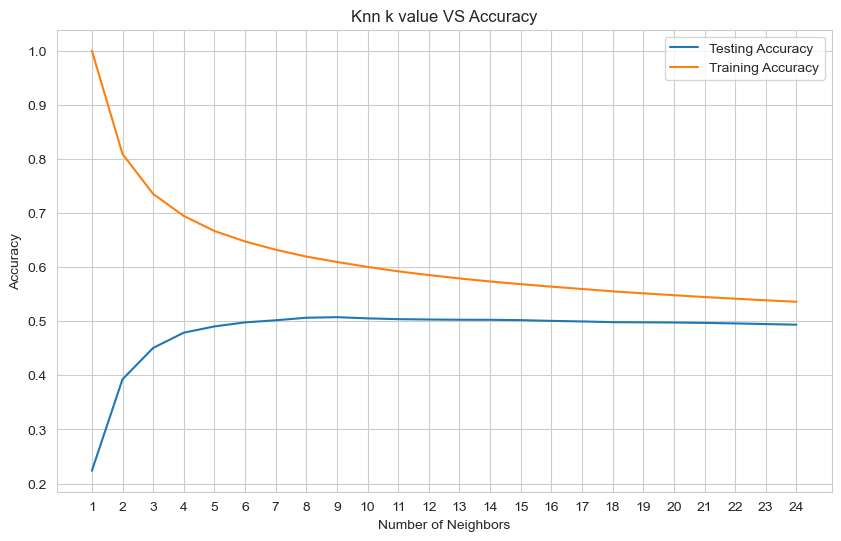

Best accuracy is 0.5075486458329039 with K = 9


In [22]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [23]:
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 10}
Best accuracy: 0.48672491114910743


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

In [ ]:
test_preds = KNeighborsClassifier(n_neighbors= 49)
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[:, 0], x_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()